In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset =pd.read_csv('Online Retail.xlsx - Online Retail.csv')

In [3]:
df=dataset.copy()

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,NaN,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.isnull().sum()

InvoiceNo           1
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Invoice no.

In [8]:
#replacing null value with mode
df['InvoiceNo'].fillna(df['InvoiceNo'].mode()[0], inplace=True)

In [9]:
# marking order status as accepted/cancelled
list_inv = list(df['InvoiceNo'])
order_status=[]
for i in list_inv:
    if i.isnumeric()==True: 
        order_status.append(1)   # 1 is accepted 
    else:
        order_status.append(2)   # 0 is cancelled


df['Order Status']= order_status     
    

In [10]:
df['Order Status'].value_counts()

1    532618
2      9291
Name: Order Status, dtype: int64

# stock code

In [11]:
(df['StockCode'].value_counts()/len(df['StockCode']))*100

85123A    0.426824
22423     0.406526
85099B    0.398406
47566     0.318688
20725     0.302449
            ...   
21431     0.000185
22275     0.000185
17001     0.000185
90187A    0.000185
72759     0.000185
Name: StockCode, Length: 4070, dtype: float64

# Transforming date column

In [12]:
# df['Weekday']= df['InvoiceDate'].astype('datetime64').dt.day_name()
df['Weekday']= df['InvoiceDate'].astype('datetime64').dt.dayofweek
# week starts with Monday = 0 and Sunday =6

In [13]:
df['Weekday'].value_counts()

3    103857
1    101808
0     95111
2     94565
4     82193
6     64375
Name: Weekday, dtype: int64

In [14]:
df['Month']= df['InvoiceDate'].astype('datetime64').dt.month
#1 for Jan and 12 for Dec

In [15]:
df['Month'].value_counts()



11    84711
12    68006
10    60742
9     50226
7     39518
5     37030
6     36874
3     36748
8     35284
1     35147
4     29916
2     27707
Name: Month, dtype: int64

In [16]:
df['Week']= df['InvoiceDate'].astype('datetime64').dt.week


C:\Users\abc\AppData\Local\Temp/ipykernel_11292/1992125270.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week']= df['InvoiceDate'].astype('datetime64').dt.week


In [17]:
df['Week'].value_counts()

49    34294
48    29060
46    21112
47    19950
45    19267
44    16699
43    14486
40    14447
38    13660
42    13652
41    13314
39    12152
50    11146
27    10608
37    10462
36    10257
19    10252
29     9912
35     9664
20     9549
23     9474
3      9395
13     8975
28     8918
2      8840
12     8471
30     8451
24     8439
25     8295
11     8183
34     8077
16     8050
18     8005
31     7964
14     7950
4      7733
8      7680
1      7670
32     7648
15     7522
21     7491
10     7475
9      7373
7      7071
33     7055
5      6994
26     6832
22     6744
6      5734
17     4854
51     4603
Name: Week, dtype: int64

In [18]:
df['FY_QTR']=df.Month.replace(to_replace=[[1,2,3],[4,5,6],[7,8,9],[10,11,12]],value =[1,2,3,4])


In [19]:
df['FY_QTR'].value_counts()

4    213459
3    125028
2    103820
1     99602
Name: FY_QTR, dtype: int64

In [20]:
df['Hour']= df.InvoiceDate.astype('datetime64').dt.hour


In [21]:
df['MAEN'] = df.Hour.replace(to_replace=[[6,7,8,9,10,11],[12,13,14,15,16],[17,18,19,20]],
                             value=['Morning', 'After_Noon', 'Evening'])

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order Status,Weekday,Month,Week,FY_QTR,Hour,MAEN
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,1,2,12,48,4,8,Morning
1,573585,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,1,2,12,48,4,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,1,2,12,48,4,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,1,2,12,48,4,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,1,2,12,48,4,8,Morning


In [23]:
df['MAEN'].value_counts()

After_Noon    350474
Morning       150376
Evening        41059
Name: MAEN, dtype: int64

In [24]:
df.drop(['Hour'],inplace=True,axis=1)

# Transforming country to UK and non-UK

In [25]:
con=list(df['Country'].unique())


In [26]:
con.remove('United Kingdom')


In [27]:
df['Country']=df['Country'].replace(to_replace=con, value ='Non-UK')

In [28]:

df['Country'].value_counts()

United Kingdom    495478
Non-UK             46431
Name: Country, dtype: int64

In [29]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Order Status', 'Weekday',
       'Month', 'Week', 'FY_QTR', 'MAEN'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
 8   Order Status  541909 non-null  int64  
 9   Weekday       541909 non-null  int64  
 10  Month         541909 non-null  int64  
 11  Week          541909 non-null  int64  
 12  FY_QTR        541909 non-null  int64  
 13  MAEN          541909 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 57.9+ MB


# Label Encoding

In [31]:
df1=df.copy()
df1.drop(['StockCode','Description','CustomerID','InvoiceDate','InvoiceNo'], axis=1, inplace=True)


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [33]:

def lab_enc(col):
    df1[col]=le.fit_transform(df1[col])
    return df1.head()

In [34]:
lab_enc('Country')

,Quantity,UnitPrice,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN
0,6,2.55,1,1,2,12,48,4,Morning
1,6,3.39,1,1,2,12,48,4,Morning
2,8,2.75,1,1,2,12,48,4,Morning
3,6,3.39,1,1,2,12,48,4,Morning
4,6,3.39,1,1,2,12,48,4,Morning


In [35]:
lab_enc('MAEN')

,Quantity,UnitPrice,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN
0,6,2.55,1,1,2,12,48,4,2
1,6,3.39,1,1,2,12,48,4,2
2,8,2.75,1,1,2,12,48,4,2
3,6,3.39,1,1,2,12,48,4,2
4,6,3.39,1,1,2,12,48,4,2


# Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1_standardized= scaler.fit_transform(df1)
df1_standardized= pd.DataFrame(df1_standardized, columns= df1.columns)
df1_standardized

,Quantity,UnitPrice,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN
0,-0.016289,-0.021301,0.306120,-0.132076,-0.233792,1.267257,1.140281,1.024635,1.542584
1,-0.016289,-0.012620,0.306120,-0.132076,-0.233792,1.267257,1.140281,1.024635,1.542584
2,-0.007118,-0.019234,0.306120,-0.132076,-0.233792,1.267257,1.140281,1.024635,1.542584
3,-0.016289,-0.012620,0.306120,-0.132076,-0.233792,1.267257,1.140281,1.024635,1.542584
4,-0.016289,-0.012620,0.306120,-0.132076,-0.233792,1.267257,1.140281,1.024635,1.542584
...,...,...,...,...,...,...,...,...,...
541904,0.011224,-0.038871,-3.266692,-0.132076,0.850391,1.267257,1.206304,1.024635,-0.710603
541905,-0.016289,-0.025952,-3.266692,-0.132076,0.850391,1.267257,1.206304,1.024635,-0.710603
541906,-0.025460,-0.004766,-3.266692,-0.132076,0.850391,1.267257,1.206304,1.024635,-0.710603
541907,-0.025460,-0.004766,-3.266692,-0.132076,0.850391,1.267257,1.206304,1.024635,-0.710603


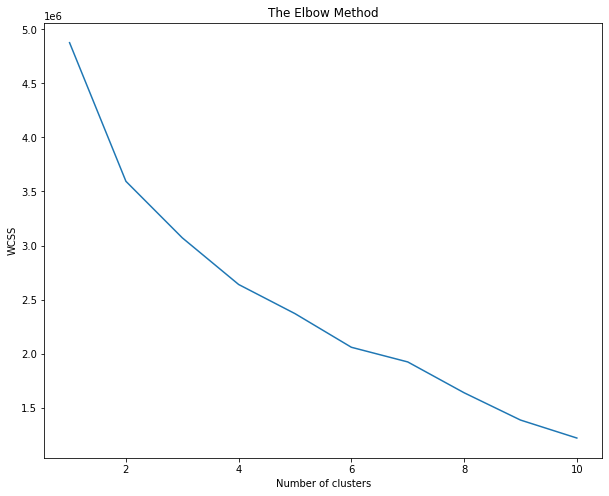

In [37]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
df['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
df
kmeans_mean_cluster

,Quantity,UnitPrice,CustomerID,Order Status,Weekday,Month,Week,FY_QTR
cluster,,,,,,,,
1,11.1,4.0,15545.2,1.0,2.3,10.0,41.4,3.6
2,8.8,3.8,15516.2,1.0,2.4,3.6,13.5,1.5
3,24.1,4.5,13195.6,1.0,2.4,7.3,29.8,2.8
4,8.1,3.6,15586.4,1.0,2.6,9.9,41.1,3.6
5,-30.0,17.1,14991.4,2.0,2.2,7.3,29.6,2.8
6,-0.8,9730.4,15796.2,1.9,1.5,7.6,30.5,2.8


In [39]:
df['cluster'].value_counts()

4    205845
2    182354
1     99416
3     45001
5      9262
6        31
Name: cluster, dtype: int64

In [40]:
df.to_csv('Retail_clustering_with_outliers_6.csv')


# Cluster profiling
## Cluster 1:
#### Country: only UK, 
#### financial quartes: 3 and 4
#### day_time: morning and evening
## Cluster 2:
 #### Country: only UK, 
 #### financial quartes : 1 and 2,
#### day_time: morning, afternoon and evening
## Cluster 3 :
#### Country: both UK and non-UK, 
#### financial quarters: all 
 #### day_time: morning, afternoon and evening
# cluster 4 
#### Quantity =6,
#### Unit price= 2.55, 
#### Country: Only UK
#### financial quartes:  3 and 4, 
#### day_time: afternoon
#  cluster 5 =  
#### Country: both UK and non-UK, 
#### other cancelled orders, more than 1 item was returned,  
#### Unit price= 2.55, consists of cancelled orders,
#### financial quarters: all 
 # Cluster6 :
#### Country: only UK,
#### Amamzon fee, consists of cancelled orders, single item was returned, high priced items,
#### financial quarters:  all


# OUTLIER TREATMENT

In [41]:
df2= df.copy()

In [42]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,1,2,12,48,4,Morning,1
1,573585,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,1,2,12,48,4,Morning,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,1,2,12,48,4,Morning,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,1,2,12,48,4,Morning,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,1,2,12,48,4,Morning,1


C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

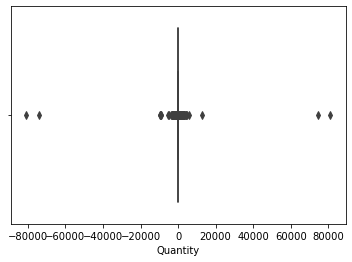

In [43]:
sns.boxplot(df2['Quantity'])

In [44]:
df2['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [45]:
df2.loc[df.Quantity<-4000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/10 14:23,0.03,15838.0,United Kingdom,2,3,12,48,4,After_Noon,5
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/11 10:17,1.04,12346.0,United Kingdom,2,1,1,3,1,Morning,5
115818,546152,72140F,throw away,-5368,3/9/11 17:25,0.00,NaN,United Kingdom,1,2,3,10,1,Evening,2
225528,556687,23003,Printing smudges/thrown away,-9058,6/14/11 10:36,0.00,NaN,United Kingdom,1,1,6,24,2,Morning,2
225529,556690,23005,printing smudges/thrown away,-9600,6/14/11 10:37,0.00,NaN,United Kingdom,1,1,6,24,2,Morning,2
225530,556691,23005,printing smudges/thrown away,-9600,6/14/11 10:37,0.00,NaN,United Kingdom,1,1,6,24,2,Morning,2
431381,573596,79323W,"Unsaleable, destroyed.",-4830,10/31/11 15:17,0.00,NaN,United Kingdom,1,0,10,44,4,After_Noon,4
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/11 9:27,2.08,16446.0,United Kingdom,2,4,12,49,4,Morning,5


In [46]:
df.loc[df.Quantity>4000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom,1,1,1,3,1,Morning,3
74614,542504,37413,NaN,5568,1/28/11 12:03,0.00,NaN,United Kingdom,1,4,1,4,1,After_Noon,2
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/11 10:52,0.72,13135.0,United Kingdom,1,4,5,21,2,Morning,2
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/11 12:26,0.21,12901.0,United Kingdom,1,3,10,43,4,After_Noon,4
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/11 15:57,0.00,13256.0,United Kingdom,1,4,11,47,4,After_Noon,4
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom,1,4,12,49,4,Morning,3


C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

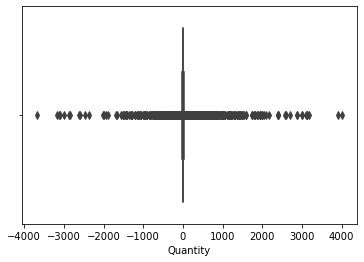

In [47]:
df2.drop(labels= [4287, 61624,115818, 225528, 225529, 225530, 431381,540422, 61619, 74614,61624, 206121,421632, 502122, 540421], axis=0, inplace=True)
sns.boxplot(df2.Quantity)


C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

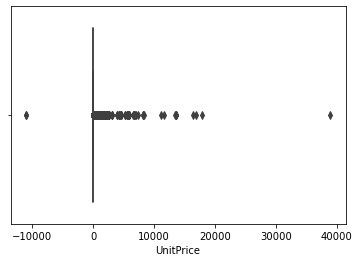

In [48]:
sns.boxplot(df2['UnitPrice'])

In [49]:
df2.loc[df2.UnitPrice>15000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/11 9:55,16888.02,NaN,United Kingdom,2,2,1,1,1,Morning,6
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/11 9:57,16453.71,NaN,United Kingdom,2,2,1,1,1,Morning,6
222681,C556445,M,Manual,-1,6/10/11 15:31,38970.00,15098.0,United Kingdom,2,4,6,23,2,After_Noon,6
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/11 11:36,17836.46,NaN,United Kingdom,2,0,12,49,4,Morning,6


In [50]:
df2.loc[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom,2,4,8,32,3,After_Noon,5
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom,2,4,8,32,3,After_Noon,5


In [51]:
df2.drop(labels= [43702, 43703,222681, 524602, 299983, 299984], axis=0, inplace=True)

In [52]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Order Status', 'Weekday',
       'Month', 'Week', 'FY_QTR', 'MAEN', 'cluster'],
      dtype='object')

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

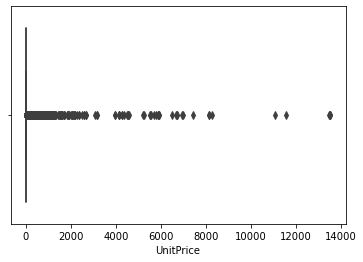

In [53]:
sns.boxplot(df2['UnitPrice'])

In [54]:
df2.to_csv('Retail- clustering without outliers.csv')


In [55]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Order Status', 'Weekday',
       'Month', 'Week', 'FY_QTR', 'MAEN', 'cluster'],
      dtype='object')

In [56]:
df_new=df2.copy()

In [57]:
df_new.drop(['StockCode','Description','CustomerID','InvoiceDate','InvoiceNo'], axis=1, inplace=True)

In [58]:
df_new.head()

,Quantity,UnitPrice,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
0,6,2.55,United Kingdom,1,2,12,48,4,Morning,1
1,6,3.39,United Kingdom,1,2,12,48,4,Morning,1
2,8,2.75,United Kingdom,1,2,12,48,4,Morning,1
3,6,3.39,United Kingdom,1,2,12,48,4,Morning,1
4,6,3.39,United Kingdom,1,2,12,48,4,Morning,1


In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
def lab_enc(col):
    df_new[col]=le.fit_transform(df_new[col])
    return df_new.head()

In [60]:
lab_enc('Country')

,Quantity,UnitPrice,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
0,6,2.55,1,1,2,12,48,4,Morning,1
1,6,3.39,1,1,2,12,48,4,Morning,1
2,8,2.75,1,1,2,12,48,4,Morning,1
3,6,3.39,1,1,2,12,48,4,Morning,1
4,6,3.39,1,1,2,12,48,4,Morning,1


In [61]:
lab_enc('MAEN')

,Quantity,UnitPrice,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
0,6,2.55,1,1,2,12,48,4,2,1
1,6,3.39,1,1,2,12,48,4,2,1
2,8,2.75,1,1,2,12,48,4,2,1
3,6,3.39,1,1,2,12,48,4,2,1
4,6,3.39,1,1,2,12,48,4,2,1


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new_standardized= scaler.fit_transform(df_new)
df_new_standardized= pd.DataFrame(df_new_standardized, columns= df_new.columns)
df_new_standardized

,Quantity,UnitPrice,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
0,-0.083568,-0.028867,0.306126,-0.132013,-0.233790,1.267258,1.140280,1.02463,1.542621,-1.427943
1,-0.083568,-0.016340,0.306126,-0.132013,-0.233790,1.267258,1.140280,1.02463,1.542621,-1.427943
2,-0.037020,-0.025884,0.306126,-0.132013,-0.233790,1.267258,1.140280,1.02463,1.542621,-1.427943
3,-0.083568,-0.016340,0.306126,-0.132013,-0.233790,1.267258,1.140280,1.02463,1.542621,-1.427943
4,-0.083568,-0.016340,0.306126,-0.132013,-0.233790,1.267258,1.140280,1.02463,1.542621,-1.427943
...,...,...,...,...,...,...,...,...,...,...
541884,0.056075,-0.054218,-3.266626,-0.132013,0.850386,1.267258,1.206303,1.02463,-0.710588,0.241436
541885,-0.083568,-0.035577,-3.266626,-0.132013,0.850386,1.267258,1.206303,1.02463,-0.710588,0.241436
541886,-0.130116,-0.005007,-3.266626,-0.132013,0.850386,1.267258,1.206303,1.02463,-0.710588,0.241436
541887,-0.130116,-0.005007,-3.266626,-0.132013,0.850386,1.267258,1.206303,1.02463,-0.710588,0.241436


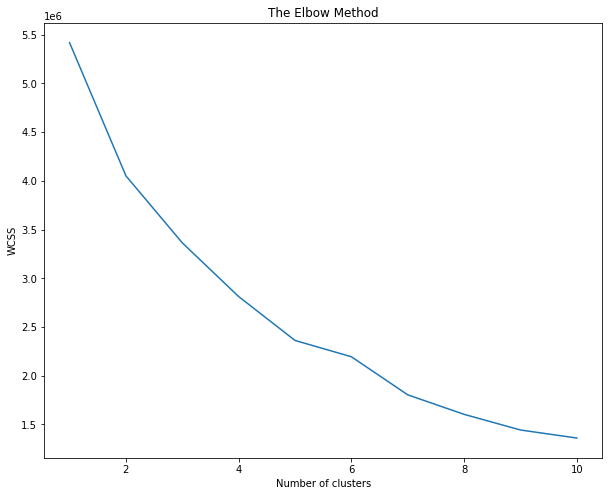

In [63]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_new_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
from sklearn.preprocessing import MinMaxScaler
mm2= MinMaxScaler()
mm2.fit(df_new)
mm_trans2 = mm2.transform(df_new)

In [65]:
df_mm2= pd.DataFrame(mm_trans2, columns=df_new.columns)
df_mm2.head()

,Quantity,UnitPrice,Country,Order Status,Weekday,Month,Week,FY_QTR,MAEN,cluster
0,0.479066,0.000188,1.0,0.0,0.333333,1.0,0.94,1.0,1.0,0.0
1,0.479066,0.000250,1.0,0.0,0.333333,1.0,0.94,1.0,1.0,0.0
2,0.479327,0.000203,1.0,0.0,0.333333,1.0,0.94,1.0,1.0,0.0
3,0.479066,0.000250,1.0,0.0,0.333333,1.0,0.94,1.0,1.0,0.0
4,0.479066,0.000250,1.0,0.0,0.333333,1.0,0.94,1.0,1.0,0.0


Text(0, 0.5, 'WCSS(within clusters sum-of-squares)')

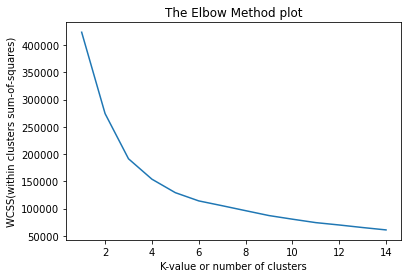

In [66]:
from sklearn.cluster import KMeans
wcss_mm2 =[]                                                                 # wcss = Within-Cluster-Sum-of-Squares
for i in range(1,15):    
    kmeans_mm2= KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans_mm2.fit(df_mm2)                                                        # fitting Kmeans algo to array
    wcss_mm2.append(kmeans_mm2.inertia_)
    
plt.plot(range(1,15),wcss_mm2) 
plt.title('The Elbow Method plot')
plt.xlabel('K-value or number of clusters')
plt.ylabel('WCSS(within clusters sum-of-squares)')

In [67]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_mm2)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
df2['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(df2.groupby('cluster').mean(),1))
df2
kmeans_mean_cluster

,Quantity,UnitPrice,CustomerID,Order Status,Weekday,Month,Week,FY_QTR
cluster,,,,,,,,
1.0,10.8,4.4,15261.7,1.0,2.3,3.4,12.9,1.5
2.0,7.9,4.5,15493.3,1.0,2.6,9.9,41.1,3.6
3.0,8.3,4.7,15357.3,1.0,2.4,3.5,13.4,1.5
4.0,17.7,3.8,14035.1,1.0,2.5,8.6,35.2,3.2
5.0,10.6,4.5,15396.6,1.0,2.3,10.0,41.4,3.6


In [68]:
df2['cluster'].value_counts()

2.0    208929
3.0    121318
5.0    100719
1.0     73287
4.0     37616
Name: cluster, dtype: int64

In [69]:
df2.to_csv('Retail_clustering_without_outliers5.csv')


PermissionError: [Errno 13] Permission denied: 'Retail_clustering_without_outliers5.csv'

In [ ]:
df2

# Cluster profiling
## Cluster 1:
#### Country: both UK and non-UK, 
#### Quantity: 9.5
#### financial quartes: 1,2 and 4
#### order status: both ordered and cancelled
#### day_time: all day
## Cluster 2:
 #### Country: both UK and non-UK, , 
#### Quantity: 8.5
#### order status: both ordered and cancelled
 #### financial quartes :  2,3 and 4
#### day_time: morning, afternoon and evening
## Cluster 3 :
#### Country: both UK and non-UK, 
#### Quantity: 11.5
#### order status: both ordered and cancelled
 #### financial quartes :  2,3 and 4
#### day_time: morning, afternoon and evening
## Cluster 5 :
#### Country: both UK and non-UK, 
#### Quantity: 10.6
#### UnitPrice: 4.6
#### order status: both ordered and cancelled
 #### financial quartes :  2,3 and 4
#### day_time: morning, afternoon and evening